# Prépartion, nettoyage et analyse exploratoire

In [1]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
#Importation du fichier Disponibilté alimentaire
dispo_alimentaire = r'C:\Users\DAVID Virginie\Documents\Cours_Data\Projet 9\DisponibiliteAlimentaire_2017.csv'
#Importation du fichier Population
population = r'C:\Users\DAVID Virginie\Documents\Cours_Data\Projet 9\Population_2000_2018.csv'
#Importation du fichier PIB
PIB = pd.read_excel(r"C:\Users\DAVID Virginie\Documents\Cours_Data\Projet 9\PIB_2017.xlsx")

In [3]:
#Importation des fichiers CSV en spécifiant le séparateur
dispo_alimentaire = pd.read_csv(dispo_alimentaire, sep=',')
population = pd.read_csv(population, sep=',')

# 1 - Analyse et exploitation des fichiers 

## 1.1 - Préparation et nettoyage du fichier dispo_alimentaire

In [4]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 176600 observation(s) ou article(s)
Le tableau comporte 14 colonne(s)


In [5]:
dispo_alimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


### La nature des données

In [6]:
print(dispo_alimentaire.dtypes)

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object


### Valeurs NaN

In [7]:
dispo_alimentaire.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

### Supprimer les colonnes inutiles

In [8]:
del dispo_alimentaire['Code année']

## 1.2 Analyse exploratoire 

### Exploration de la quantité de poulet par pays

In [9]:
#Créer un df 
alimentaire_export_volaille = dispo_alimentaire[
    (dispo_alimentaire["Élément"] == "Exportations - Quantité") & 
    (dispo_alimentaire["Produit"] == "Viande de Volailles")
][["Zone", "Élément", "Produit", "Valeur"]]

alimentaire_export_volaille.head()

,Zone,Élément,Produit,Valeur
1707,Afrique du Sud,Exportations - Quantité,Viande de Volailles,63.0
2716,Albanie,Exportations - Quantité,Viande de Volailles,0.0
3775,Algérie,Exportations - Quantité,Viande de Volailles,0.0
4876,Allemagne,Exportations - Quantité,Viande de Volailles,646.0
5936,Angola,Exportations - Quantité,Viande de Volailles,0.0


### Graphique de la répartition des exportations de volailles par zone 

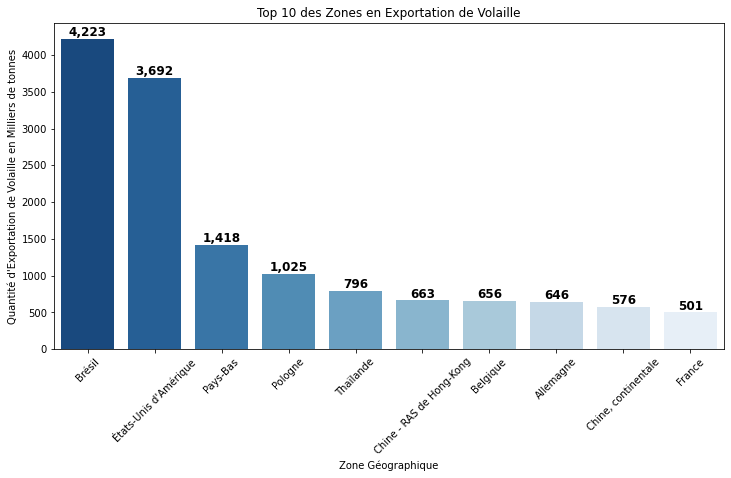

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Trier et sélectionner les 10 premières zones
top_10_zones = alimentaire_export_volaille.groupby("Zone")["Valeur"].sum().nlargest(10).reset_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_10_zones, x="Zone", y="Valeur", palette="Blues_r")

# Ajouter les valeurs au-dessus des barres
for index, row in enumerate(top_10_zones.itertuples()):
    ax.text(index, row.Valeur, f'{row.Valeur:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(rotation=45) 
plt.xlabel("Zone Géographique")
plt.ylabel("Quantité d'Exportation de Volaille en Milliers de tonnes")
plt.title("Top 10 des Zones en Exportation de Volaille")
plt.show()

In [11]:
#Importation en quantité des poulets par pays 
#Créer un df 
alimentaire_import_volaille = dispo_alimentaire[
    (dispo_alimentaire["Élément"] == "Importations - Quantité") & 
    (dispo_alimentaire["Produit"] == "Viande de Volailles")
][["Zone", "Élément", "Produit", "Valeur"]]

alimentaire_import_volaille.head()

,Zone,Élément,Produit,Valeur
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.0
1705,Afrique du Sud,Importations - Quantité,Viande de Volailles,514.0
2714,Albanie,Importations - Quantité,Viande de Volailles,38.0
3773,Algérie,Importations - Quantité,Viande de Volailles,2.0
4874,Allemagne,Importations - Quantité,Viande de Volailles,842.0


### Graphique de la répartition des importations de volailles par zone 

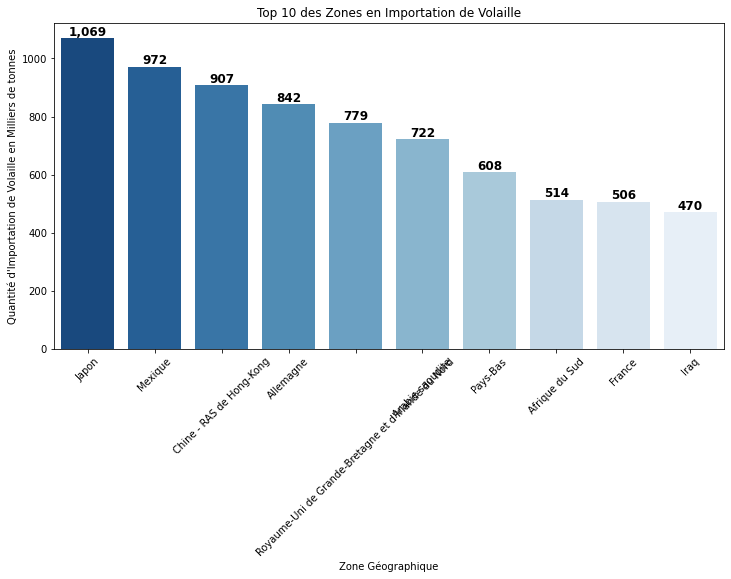

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Trier et sélectionner les 10 premières zones
top_10_zones = alimentaire_import_volaille.groupby("Zone")["Valeur"].sum().nlargest(10).reset_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_10_zones, x="Zone", y="Valeur", palette="Blues_r")

# Ajouter les valeurs au-dessus des barres
for index, row in enumerate(top_10_zones.itertuples()):
    ax.text(index, row.Valeur, f'{row.Valeur:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)  
plt.xlabel("Zone Géographique")
plt.ylabel("Quantité d'Importation de Volaille en Milliers de tonnes")
plt.title("Top 10 des Zones en Importation de Volaille")
plt.show()

## 2.1 - Préparation et nettoyage du fichier population 

In [13]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 4411 observation(s) ou article(s)
Le tableau comporte 15 colonne(s)


In [14]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [15]:
#La nature des données dans chacune des colonnes
print(population.dtypes)

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object


In [16]:
#Repérer les valeurs NaN
population.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [17]:
#Supprimer la colonne 'Note' qui continet beaucoup de NaN et les colonnes inutiles
population.drop(['Note', 'Code année'], axis=1, inplace=True)

In [18]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Année,Unité,Valeur,Symbole,Description du Symbole
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,1000 personnes,20779.953,X,Sources internationales sûres
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,1000 personnes,21606.988,X,Sources internationales sûres
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,1000 personnes,22600.770,X,Sources internationales sûres
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,1000 personnes,23680.871,X,Sources internationales sûres
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,1000 personnes,24726.684,X,Sources internationales sûres


## 2.2 Analyse exploratoire 

In [19]:
#Création df pour voir la population en 2017 
population_2017 = population.loc[population["Année"] == 2017, ["Année", "Zone", "Valeur"]].copy()

population_2017.head()

,Année,Zone,Valeur
17,2017,Afghanistan,36296.113
36,2017,Afrique du Sud,57009.756
55,2017,Albanie,2884.169
74,2017,Algérie,41389.189
93,2017,Allemagne,82658.409


### Graphique de la répartition de la population par zone en 2017

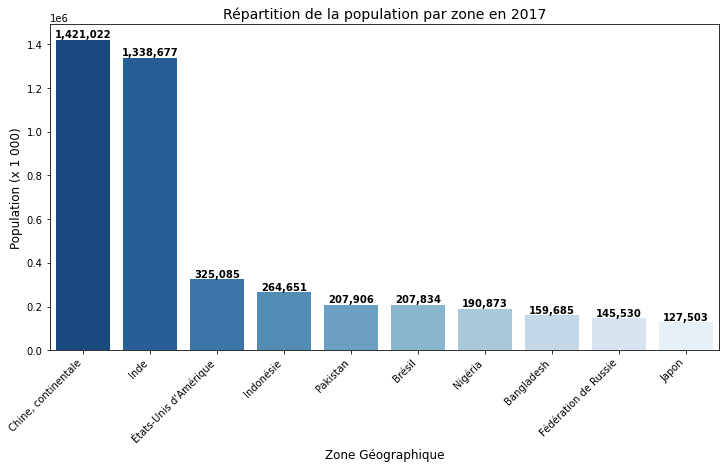

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trier les 10 zones les plus peuplées
top10_population = population_2017.sort_values(by="Valeur", ascending=False).head(10)

# Création du graphique
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top10_population, x="Zone", y="Valeur", palette="Blues_r")

# Ajouter les chiffres sur les barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Titres et labels
plt.title("Répartition de la population par zone en 2017", fontsize=14)
plt.xlabel("Zone Géographique", fontsize=12)
plt.ylabel("Population (x 1 000)", fontsize=12)

# Affichage du graphique
plt.show()

In [21]:
#Population des 5 pays les plus riches en 2017
population_2017_pays_riches = population.loc[
    (population["Année"] == 2017) & 
    (population["Zone"].isin([
        "États-Unis d'Amérique", "Chine - RAS de Hong-Kong","Chine, continentale", "Chine, Taiwan Province de", "Chine - RAS de Macao", "Japon", "Allemagne", "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord" ]))
    , ["Année", "Zone", "Valeur"]
].copy()

population_2017_pays_riches.head()

,Année,Zone,Valeur
93,2017,Allemagne,82658.409
785,2017,Chine - RAS de Hong-Kong,7306.322
804,2017,Chine - RAS de Macao,622.585
823,2017,"Chine, continentale",1421021.791
842,2017,"Chine, Taiwan Province de",23674.546


### Graphique de la répartion de la population par pays les plus riches 

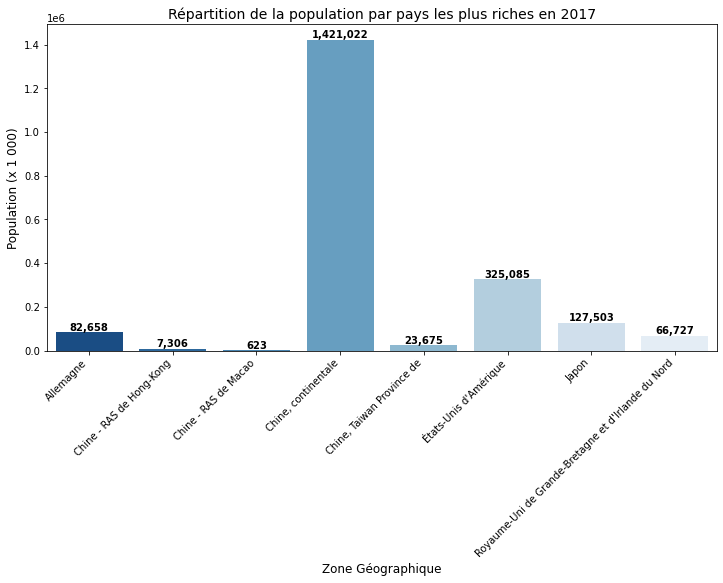

In [22]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=population_2017_pays_riches, x="Zone", y="Valeur", palette="Blues_r")

# Ajouter les chiffres sur les barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.xticks(rotation=45, ha='right')

# Titres et labels
plt.title("Répartition de la population par pays les plus riches en 2017", fontsize=14)
plt.xlabel("Zone Géographique", fontsize=12)
plt.ylabel("Population (x 1 000)", fontsize=12)


plt.show()

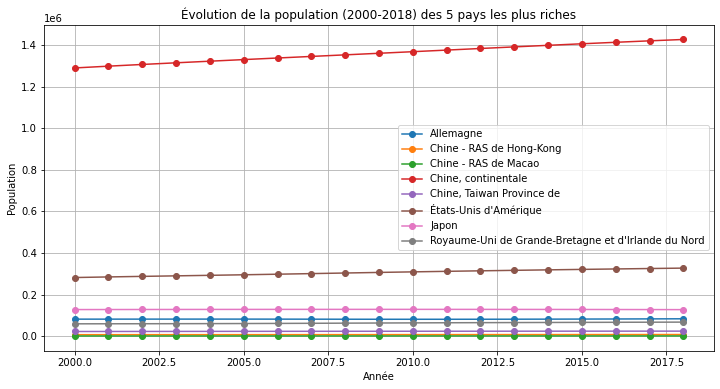

In [23]:
#Evolution de la population des 5 pays les plus riches entre 20000 et 2018
# Filtrer uniquement les 5 pays les plus riches
population_evolution = population[
    population["Zone"].isin([
        "États-Unis d'Amérique", "Chine - RAS de Hong-Kong","Chine, continentale", "Chine, Taiwan Province de", "Chine - RAS de Macao", "Japon", "Allemagne", "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord" ])
   
].copy()

# Tracer l'évolution de la population
plt.figure(figsize=(12, 6))
for pays in population_evolution["Zone"].unique():
    subset = population_evolution[population_evolution["Zone"] == pays]
    plt.plot(subset["Année"], subset["Valeur"], marker="o", label=pays)

plt.title("Évolution de la population (2000-2018) des 5 pays les plus riches")
plt.xlabel("Année")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()

## 3.1 - Préparation et nettoyage du fichier PIB

In [28]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(PIB.shape[0]))
print("Le tableau comporte {} colonne(s)".format(PIB.shape[1]))

Le tableau comporte 211 observation(s) ou article(s)
Le tableau comporte 15 colonne(s)


In [29]:
PIB.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,1.903430e+04,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,202,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,3.808514e+05,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,3,Albanie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,1.301973e+04,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Algérie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,1.700970e+05,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,79,Allemagne,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,3.690849e+06,X,Ciffre de sources internationales,NaN


In [30]:
#Renommer colonne Code Zone (FAO)
PIB = PIB.rename(columns={"Code zone (FAO)": "Code zone"})

In [31]:
#La nature des données dans chacune des colonnes
print(PIB.dtypes)

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object


In [32]:
#Repérer les valeurs NaN
PIB.isna().sum()

Code Domaine                0
Domaine                     0
Code zone                   0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      211
dtype: int64

In [33]:
#Trier les PIB par ordre décroissant et sortir les 5 Pays 
PIB_decr = PIB[["Zone", "Valeur"]].sort_values(by="Valeur", ascending=False).head(5)

PIB_decr.head()

,Zone,Valeur
63,États-Unis d'Amérique,1.961210e+07
39,Chine,1.270215e+07
42,"Chine, continentale",1.231049e+07
99,Japon,4.930837e+06
4,Allemagne,3.690849e+06


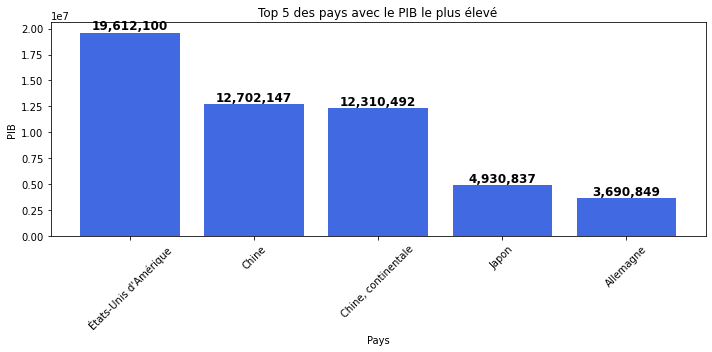

In [34]:
# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(10, 5))

# Créer le graphique en barres
ax.bar(PIB_decr["Zone"], PIB_decr["Valeur"], color="royalblue")

# Ajouter les valeurs au-dessus des barres
for index, row in enumerate(PIB_decr.itertuples()):
    ax.text(index, row.Valeur, f'{row.Valeur:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Ajouter les labels et le titre
ax.set_xlabel("Pays")
ax.set_ylabel("PIB")
ax.set_title("Top 5 des pays avec le PIB le plus élevé")
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()

## 4.1 - Jointure

In [35]:
#Faire la jointure entre les 2 fichiers
dispo_alimentaire_population = pd.merge(population, dispo_alimentaire, on="Code zone", how="outer")
dispo_alimentaire_population.head()

,Code Domaine_x,Domaine_x,Code zone,Zone_x,Code Élément_x,Élément_x,Code Produit_x,Produit_x,Année_x,Unité_x,...,Zone_y,Code Élément_y,Élément_y,Code Produit_y,Produit_y,Année_y,Unité_y,Valeur_y,Symbole_y,Description du Symbole_y
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,1000 personnes,...,Afghanistan,5511.0,Production,2511.0,Blé et produits,2017.0,Milliers de tonnes,4281.0,S,Données standardisées
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,1000 personnes,...,Afghanistan,5611.0,Importations - Quantité,2511.0,Blé et produits,2017.0,Milliers de tonnes,2302.0,S,Données standardisées
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,1000 personnes,...,Afghanistan,5072.0,Variation de stock,2511.0,Blé et produits,2017.0,Milliers de tonnes,-119.0,S,Données standardisées
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,1000 personnes,...,Afghanistan,5911.0,Exportations - Quantité,2511.0,Blé et produits,2017.0,Milliers de tonnes,0.0,S,Données standardisées
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,1000 personnes,...,Afghanistan,5301.0,Disponibilité intérieure,2511.0,Blé et produits,2017.0,Milliers de tonnes,6701.0,S,Données standardisées


In [36]:
#Faire la jointure avec le fichier PIB
dispo_alimentaire_population_final = pd.merge(dispo_alimentaire_population, PIB, on="Code zone", how="outer")
dispo_alimentaire_population_final.head()

,Code Domaine_x,Domaine_x,Code zone,Zone_x,Code Élément_x,Élément_x,Code Produit_x,Produit_x,Année_x,Unité_x,...,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511.0,Population totale,3010.0,Population-Estimations,2000.0,1000 personnes,...,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,19034.30282,X,Ciffre de sources internationales,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511.0,Population totale,3010.0,Population-Estimations,2000.0,1000 personnes,...,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,19034.30282,X,Ciffre de sources internationales,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511.0,Population totale,3010.0,Population-Estimations,2000.0,1000 personnes,...,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,19034.30282,X,Ciffre de sources internationales,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511.0,Population totale,3010.0,Population-Estimations,2000.0,1000 personnes,...,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,19034.30282,X,Ciffre de sources internationales,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511.0,Population totale,3010.0,Population-Estimations,2000.0,1000 personnes,...,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,19034.30282,X,Ciffre de sources internationales,NaN


In [37]:
#La nature des données dans chacune des colonnes
print(dispo_alimentaire_population_final.dtypes)

Code Domaine_x               object
Domaine_x                    object
Code zone                     int64
Zone_x                       object
Code Élément_x              float64
Élément_x                    object
Code Produit_x              float64
Produit_x                    object
Année_x                     float64
Unité_x                      object
Valeur_x                    float64
Symbole_x                    object
Description du Symbole_x     object
Code Domaine_y               object
Domaine_y                    object
Zone_y                       object
Code Élément_y              float64
Élément_y                    object
Code Produit_y              float64
Produit_y                    object
Année_y                     float64
Unité_y                      object
Valeur_y                    float64
Symbole_y                    object
Description du Symbole_y     object
Code Domaine                 object
Domaine                      object
Zone                        

In [38]:
# Liste des pays à garder
pays_a_garder = ["États-Unis d'Amérique", "Chine", "Chine, continentale", "Japon", "Allemagne"]

# Filtrer le DataFrame
dispo_alimentaire_population_final = dispo_alimentaire_population_final[
    dispo_alimentaire_population_final["Zone"].isin(pays_a_garder)
]


dispo_alimentaire_population_final.head()

,Code Domaine_x,Domaine_x,Code zone,Zone_x,Code Élément_x,Élément_x,Code Produit_x,Produit_x,Année_x,Unité_x,...,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
75886,OA,Séries temporelles annuelles,79,Allemagne,511.0,Population totale,3010.0,Population-Estimations,2000.0,1000 personnes,...,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,3.690849e+06,X,Ciffre de sources internationales,NaN
75887,OA,Séries temporelles annuelles,79,Allemagne,511.0,Population totale,3010.0,Population-Estimations,2000.0,1000 personnes,...,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,3.690849e+06,X,Ciffre de sources internationales,NaN
75888,OA,Séries temporelles annuelles,79,Allemagne,511.0,Population totale,3010.0,Population-Estimations,2000.0,1000 personnes,...,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,3.690849e+06,X,Ciffre de sources internationales,NaN
75889,OA,Séries temporelles annuelles,79,Allemagne,511.0,Population totale,3010.0,Population-Estimations,2000.0,1000 personnes,...,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,3.690849e+06,X,Ciffre de sources internationales,NaN
75890,OA,Séries temporelles annuelles,79,Allemagne,511.0,Population totale,3010.0,Population-Estimations,2000.0,1000 personnes,...,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,3.690849e+06,X,Ciffre de sources internationales,NaN


In [39]:
#Repérer les valeurs NaN
dispo_alimentaire_population_final.isna().sum()

Code Domaine_x                  1
Domaine_x                       1
Code zone                       0
Zone_x                          1
Code Élément_x                  1
Élément_x                       1
Code Produit_x                  1
Produit_x                       1
Année_x                         1
Unité_x                         1
Valeur_x                        1
Symbole_x                       1
Description du Symbole_x        1
Code Domaine_y                  1
Domaine_y                       1
Zone_y                          1
Code Élément_y                  1
Élément_y                       1
Code Produit_y                  1
Produit_y                       1
Année_y                         1
Unité_y                         1
Valeur_y                        1
Symbole_y                       1
Description du Symbole_y        1
Code Domaine                    0
Domaine                         0
Zone                            0
Code Élément                    0
Élément       

In [49]:
dispo_alimentaire_population_final.dropna(inplace=True)

In [50]:
#Repérer les valeurs NaN
dispo_alimentaire_population_final.isna().sum()

Code Domaine_x              0
Domaine_x                   0
Code zone                   0
Zone_x                      0
Code Élément_x              0
Élément_x                   0
Code Produit_x              0
Produit_x                   0
Année_x                     0
Unité_x                     0
Valeur_x                    0
Symbole_x                   0
Description du Symbole_x    0
Code Domaine_y              0
Domaine_y                   0
Zone_y                      0
Code Élément_y              0
Élément_y                   0
Code Produit_y              0
Produit_y                   0
Année_y                     0
Unité_y                     0
Valeur_y                    0
Symbole_y                   0
Description du Symbole_y    0
Code Domaine                0
Domaine                     0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année     

### Enregistrement du nouveau df final sur pc

In [51]:
dispo_alimentaire_population_final.to_csv(r"C:\Users\DAVID Virginie\Documents\Cours_Data\Projet 9\dispo_alimentaire_population_final.csv", index=False)